In [73]:
# load packages and CSV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('datasets/public-streets.csv', delimiter=';')
df.shape

(17063, 4)

In [74]:
# add dummy data for features
df['dummy1'] = np.random.uniform(0,0.5, size=len(df))
df['dummy2'] = np.random.uniform(3,5, size=len(df))

df.describe()

,dummy1,dummy2
count,17063.000000,17063.000000
mean,0.250497,3.996252
std,0.144668,0.574149
min,0.000110,3.000056
25%,0.124374,3.509163
50%,0.251259,3.987171
75%,0.375900,4.487577
max,0.499988,4.999961


In [75]:
# standardize columns
scaler = StandardScaler()
df[['dummy1_S', 'dummy2_S']] = scaler.fit_transform(df[['dummy1', 'dummy2']])
df

,Geom,HBLOCK,STREETUSE,geo_point_2d,dummy1,dummy2,dummy1_S,dummy2_S
0,"{""coordinates"": [[-123.03675112317202, 49.2292...",3200 E 45TH AV,Residential,"49.229274617812216, -123.03658170079468",0.129410,3.417292,-0.837025,-1.008409
1,"{""coordinates"": [[-123.04311181616343, 49.2306...",5800 RUPERT ST,Secondary Arterial,"49.23042440539015, -123.04311348361908",0.455150,4.983294,1.414680,1.719189
2,"{""coordinates"": [[-123.14357550431286, 49.2519...",3800 MARGUERITE ST,Residential,"49.2514173117699, -123.14389108427886",0.169353,4.788804,-0.560913,1.380435
3,"{""coordinates"": [[-123.14043574098115, 49.2558...",1600 MARPOLE AV,Residential,"49.25575606751888, -123.14131458868566",0.323003,3.367302,0.501207,-1.095480
4,"{""coordinates"": [[-123.1363052326403, 49.25795...",1400 W 15TH AV,Residential,"49.257966520696655, -123.13718043648362",0.092717,4.580714,-1.090669,1.017992
...,...,...,...,...,...,...,...,...
17058,"{""coordinates"": [[-123.05932466417195, 49.2166...",7400 NANAIMO ST,Residential,"49.21624399664698, -123.0593311218436",0.227352,3.683245,-0.159990,-0.545184
17059,"{""coordinates"": [[-123.073358710063, 49.276703...",1500 VENABLES ST,Secondary Arterial,"49.276700328376606, -123.07306340585446",0.453409,4.531009,1.402649,0.931417
17060,"{""coordinates"": [[-123.0682615252858, 49.28121...",400 SALSBURY DRIVE,Residential,"49.28096170951011, -123.06826964695267",0.316511,3.957089,0.456327,-0.068214
17061,"{""coordinates"": [[-123.05868486313364, 49.2408...",2300 E 30TH AV,Residential,"49.240739473802684, -123.05847390990945",0.124059,4.327573,-0.874011,0.577081


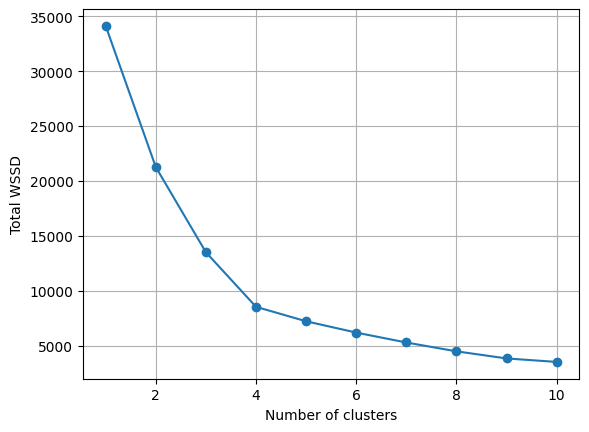

In [76]:
# elbow method for optimal k value
def find_optimal_k (data, max_k):
    ks = []     # k value array
    wssds = []  # within-cluster sum of squared distances (WSSD) array

    for k in range (1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        ks.append(k)
        wssds.append(kmeans.inertia_)

    # plot inertia against k values
    #fig = plt.subplots(figsize=(10,5))
    plt.plot(ks, wssds, 'o-')

    plt.xlabel('Number of clusters')
    plt.ylabel('Total WSSD')
    plt.grid(True)
    plt.show()


find_optimal_k(df[['dummy1_S', 'dummy2_S']], 11)

# store optimal k
optimal_k = 4

In [77]:
# run k-means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(df[['dummy1_S', 'dummy2_S']])
df[f"k={optimal_k} clustering"] = kmeans.labels_
df


,Geom,HBLOCK,STREETUSE,geo_point_2d,dummy1,dummy2,dummy1_S,dummy2_S,k=4 clustering
0,"{""coordinates"": [[-123.03675112317202, 49.2292...",3200 E 45TH AV,Residential,"49.229274617812216, -123.03658170079468",0.129410,3.417292,-0.837025,-1.008409,0
1,"{""coordinates"": [[-123.04311181616343, 49.2306...",5800 RUPERT ST,Secondary Arterial,"49.23042440539015, -123.04311348361908",0.455150,4.983294,1.414680,1.719189,1
2,"{""coordinates"": [[-123.14357550431286, 49.2519...",3800 MARGUERITE ST,Residential,"49.2514173117699, -123.14389108427886",0.169353,4.788804,-0.560913,1.380435,3
3,"{""coordinates"": [[-123.14043574098115, 49.2558...",1600 MARPOLE AV,Residential,"49.25575606751888, -123.14131458868566",0.323003,3.367302,0.501207,-1.095480,2
4,"{""coordinates"": [[-123.1363052326403, 49.25795...",1400 W 15TH AV,Residential,"49.257966520696655, -123.13718043648362",0.092717,4.580714,-1.090669,1.017992,3
...,...,...,...,...,...,...,...,...,...
17058,"{""coordinates"": [[-123.05932466417195, 49.2166...",7400 NANAIMO ST,Residential,"49.21624399664698, -123.0593311218436",0.227352,3.683245,-0.159990,-0.545184,0
17059,"{""coordinates"": [[-123.073358710063, 49.276703...",1500 VENABLES ST,Secondary Arterial,"49.276700328376606, -123.07306340585446",0.453409,4.531009,1.402649,0.931417,1
17060,"{""coordinates"": [[-123.0682615252858, 49.28121...",400 SALSBURY DRIVE,Residential,"49.28096170951011, -123.06826964695267",0.316511,3.957089,0.456327,-0.068214,2
17061,"{""coordinates"": [[-123.05868486313364, 49.2408...",2300 E 30TH AV,Residential,"49.240739473802684, -123.05847390990945",0.124059,4.327573,-0.874011,0.577081,3


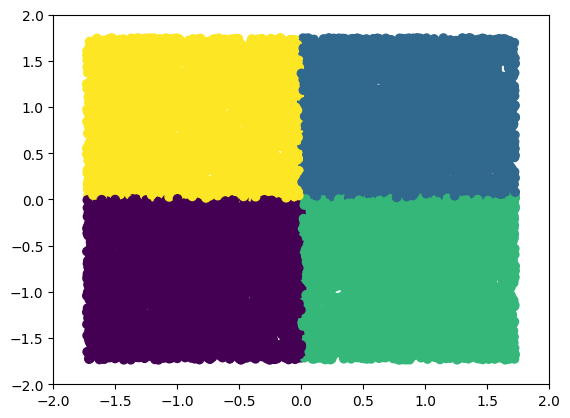

In [85]:
# plot k-means clustering results
plt.scatter(x=df['dummy1_S'], y=df['dummy2_S'], c=df['k=4 clustering'])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

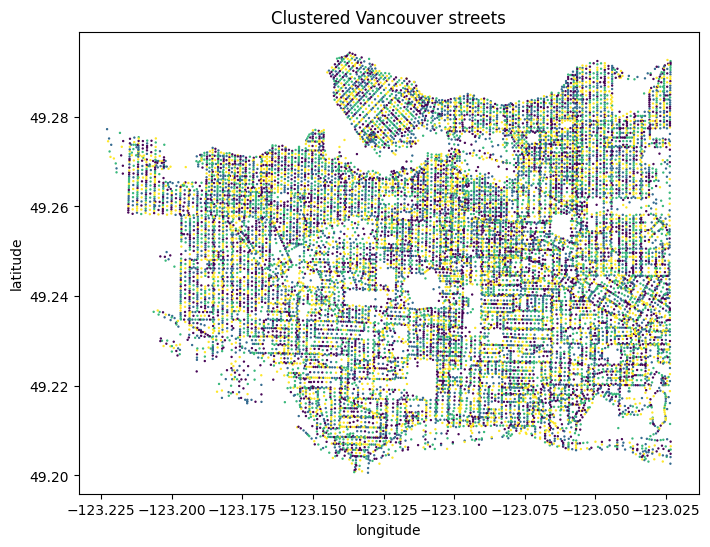

In [90]:
# turn geo_point_2d into string
df["geo_point_2d"] = df["geo_point_2d"].astype(str)
# split geo_point_2d into Latitude and Longitude columns
df[["latitude", "longitude"]] = df["geo_point_2d"].str.split(",", expand=True).astype(float)

# plot by location
plt.figure(figsize=(8, 6))
plt.scatter(df["longitude"], df["latitude"], c=df['k=4 clustering'], cmap="viridis", s=0.5)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Clustered Vancouver streets")
plt.show()